In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-train/titanic_train.csv
/kaggle/input/titanic-test/titanic_test.csv


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('../input/titanic-train/titanic_train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('../input/titanic-test/titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
from collections import Counter
Counter()


Counter()

In [8]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


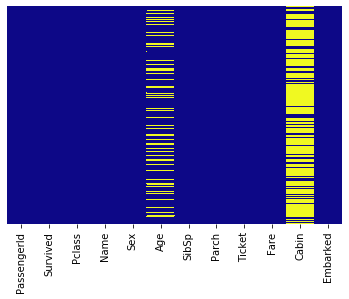

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

*the heatmap shows there has been major missing values in age and cabin columns*

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

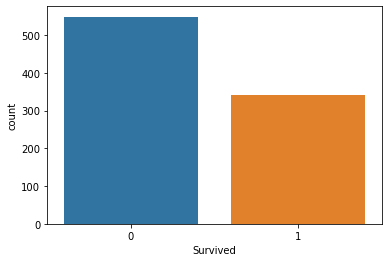

In [13]:
sns.countplot(train['Survived'])

*0= number of deaths and 1 = number of survivals*

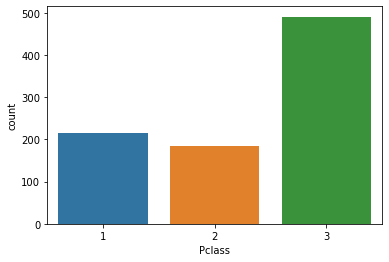

In [14]:
sns.countplot(train['Pclass'])


array([1, 0, 3, 4, 2, 5, 8])

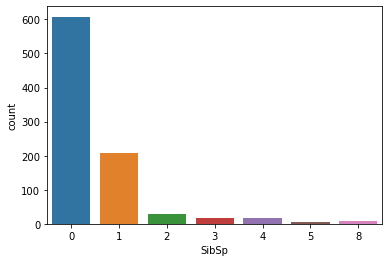

In [15]:
sns.countplot(train['SibSp'])
train.SibSp.unique()


array([0, 1, 2, 5, 3, 4, 6])

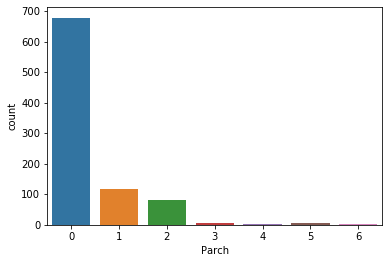

In [16]:
sns.countplot(train['Parch'])
train.Parch.unique()

*we can clearly see that parch and Sibsp are related columns with equal no. of categories*

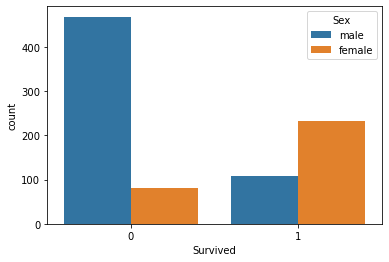

In [17]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

no of females survived is more compared to males

array(['S', 'C', 'Q', nan], dtype=object)

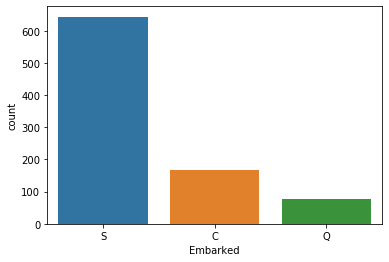

In [18]:
sns.countplot(train['Embarked'])
train.Embarked.unique()

*there are 3 categories of places people coming from in the ship *

In [19]:
 train.drop(['Cabin'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


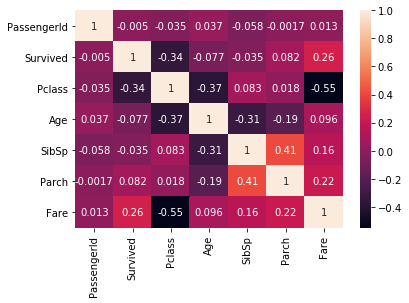

In [20]:
sns.heatmap(train.corr(),annot=True)

from the above plot we can see that the highest absolute correlated variable for age is Pclass.

In [21]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [22]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')

In [23]:

print(train["Age"].isnull().sum())

0


In [24]:
from statistics import mode
train["Embarked"] = train["Embarked"].fillna(mode(train["Embarked"]))

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
train.Sex = encode.fit_transform(train.Sex)
train.Embarked = encode.fit_transform(train.Embarked)


In [27]:
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)

In [28]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,24.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [29]:

X = train.loc[:,train.columns!="Survived"]
y= train.Survived

In [30]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=13)

In [34]:
from collections import Counter
Counter(y)

Counter({0: 549, 1: 342})

In [35]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (801, 8)
X_test shape (90, 8)
y_train shape (801,)
y_test shape (90,)


In [36]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8111111111111111

In [37]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,50,9
1,8,23


In [38]:
y_test.head()

736    0
421    0
442    0
196    0
200    0
Name: Survived, dtype: int64

In [39]:
y_predict


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0])

****SMOTE****

In [40]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=13)
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 490, 1: 311})
Counter({1: 490, 0: 490})


In [42]:
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8333333333333334

In [43]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,51,8
1,7,24


***FOR TEST DATASET***

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [48]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
test.Sex = encode.fit_transform(test.Sex)
test.Embarked = encode.fit_transform(test.Embarked)


In [49]:
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')
from statistics import mode
test["Fare"] = test["Fare"].fillna(mode(test["Fare"]))

In [50]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [52]:
data = train + test

In [53]:
data.head()
data.shape

(891, 9)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    float64
 2   Fare         418 non-null    float64
 3   Parch        418 non-null    float64
 4   PassengerId  418 non-null    float64
 5   Pclass       418 non-null    float64
 6   Sex          418 non-null    float64
 7   SibSp        418 non-null    float64
 8   Survived     0 non-null      float64
dtypes: float64(9)
memory usage: 69.6 KB


In [55]:
data.isnull().sum()

Age            473
Embarked       473
Fare           473
Parch          473
PassengerId    473
Pclass         473
Sex            473
SibSp          473
Survived       891
dtype: int64

In [56]:
data['Survived'] = data['Survived'].fillna(0)
A = data.loc[:,data.columns!="Survived"]
b= data.Survived

In [57]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.1,random_state=13)

In [58]:
b_train.shape

(801,)

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)
b_predict = model.predict(X_test)
accuracy_score(b_test,b_predict)

0.6444444444444445

In [60]:
 pd.crosstab(b_test,b_predict)

col_0,0,1
Survived,,
0.0,58,32


In [61]:
b_test

736    0.0
421    0.0
442    0.0
196    0.0
200    0.0
      ... 
411    0.0
480    0.0
435    0.0
157    0.0
4      0.0
Name: Survived, Length: 90, dtype: float64

In [62]:
b_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0])

In [63]:
len(b_predict)

90

In [64]:
len(b_test)

90

SVM****

In [65]:
X = train.loc[:,train.columns!="Survived"]
y= train.Survived

In [66]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [67]:
enc = LabelEncoder()
X.PassengerId = enc.fit_transform(X.PassengerId)
X.Pclass = enc.fit_transform(X.Pclass)
X.Sex = enc.fit_transform(X.Sex)
X.Age = enc.fit_transform(X.Age)
X.SibSp = enc.fit_transform(X.SibSp)
X.Parch = enc.fit_transform(X.Parch)
X.Fare = enc.fit_transform(X.Fare)
X.Embarked = enc.fit_transform(X.Embarked)
X.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,2,2,0,34,0,0,41,2


In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [69]:
from sklearn.svm import SVC
model = SVC(C = 2, gamma = 1,kernel='rbf',random_state=13) 
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6777777777777778

In [70]:
pd.crosstab(y_test,y_predict)

col_0,0
Survived,
0,61
1,29


**grid search evaluation**

In [71]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['rbf'],
                  'C': [2,3,4,5],
                    'gamma': [0.1,1.0,2.0]}
grid_model = GridSearchCV(SVC(),parameters,verbose=2)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=2, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=2, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=1.0, kernel=rbf ......................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=2, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=2.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=2.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=2.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=2.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=2.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=2.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=2.0, kernel=rbf ......................................
[CV] ....................... C=2, gamma=2.0, kernel=rbf, total=   0.0s
[CV] C=2, gamma=2.0, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 3, 4, 5], 'gamma': [0.1, 1.0, 2.0],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [72]:
grid_model.best_score_


0.6117391304347827

In [73]:
grid_model.best_params_

{'C': 2, 'gamma': 1.0, 'kernel': 'rbf'}

**RANDOM FOREST CLASSIFIER**

In [74]:
X = train.loc[:,train.columns!="Survived"]
y= train.Survived

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=22, criterion="gini", random_state=14)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=14, verbose=0,
                       warm_start=False)

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
accuracy_score(y_test,y_predict)

0.6777777777777778

In [78]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 61, 1: 29})


col_0,0
Survived,
0,61
1,29


In [79]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[56  5]
 [ 7 22]]
Accuracy score: 0.8666666666666667
Precision score: 0.8148148148148148
Recall score: 0.7586206896551724


**KNN**

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
X = train.loc[:,train.columns!="Survived"]
y= train.Survived

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [97]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7555555555555555

In [98]:
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7555555555555555

In [99]:
model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test,y_predict)

0.7555555555555555

In [100]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,53,8
1,14,15


In [101]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_predict) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_predict) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_predict) 
print("Recall score:",recall)

[[53  8]
 [14 15]]
Accuracy score: 0.7555555555555555
Precision score: 0.6521739130434783
Recall score: 0.5172413793103449


**XGBOOST**

In [102]:
!pip install xgboost

In [103]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [114]:
model = XGBClassifier(learning_rate=0.1,random_rate=11,n_estimators=250)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_rate=11, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [115]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8430493273542601

In [ ]:
pd.crosstab(y_test,y_predict)